# Resolução do [Challenge](https://zrp.github.io/challenges/data-science/) da ZRP

## Importação das bibliotecas

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Download dos dados

In [235]:
!wget https://zrp.github.io/challenges/data-science/data.csv

--2023-03-01 00:05:18--  https://zrp.github.io/challenges/data-science/data.csv
Resolving zrp.github.io (zrp.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to zrp.github.io (zrp.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 643839 (629K) [text/csv]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>] 628.75K  --.-KB/s    in 0.03s   

2023-03-01 00:05:18 (18.5 MB/s) - ‘data.csv.2’ saved [643839/643839]



## Carregamento dos dados, e criação do dataframe com o Pandas

É necessário remover as [ ] dos dados, e dividir os dados entre colunas diferentes, separando através da virgula dos valores de leitura dos sensores 

In [236]:
data_start_df = pd.read_csv('/content/data.csv')
data_start_df.head(5)

,read0,read1,read2,read3,read4,read5,read6,read7,read8,read9,start_timestamp,end_timestamp,inference
0,"[-0.29, -0.07]","[0.24, -0.62]","[-0.29, 0.14]","[0.1, 0.14]","[0.41, -0.45]","[0.41, 0.22]","[0.36, 0.03]","[0.37, 0.42]","[0.19, 0.42]","[0.19, 0.01]",1665656955,1665656967,1
1,"[-0.25, -0.04]","[0.04, 0.19]","[0.11, 0.19]","[-0.23, 0.07]","[-0.23, -0.38]","[-0.48, -0.37]","[-0.42, -0.33]","[-0.23, -0.33]","[-0.23, -0.2]","[-0.12, -0.31]",1665656968,1665656980,1
2,"[-0.59, -0.27]","[-0.42, -0.27]","[-0.42, -0.34]","[-0.35, -0.37]","[-0.39, -0.36]","[-0.47, -0.36]","[-0.12, -0.39]","[-0.12, -0.06]","[-0.01, -0.05]","[-0.11, 0.46]",1665656982,1665656994,1
3,"[-0.2, -0.15]","[-0.44, -0.31]","[-0.65, -0.31]","[-0.7, -0.17]","[-0.7, -0.15]","[-0.63, -0.12]","[-0.56, -0.13]","[-0.46, -0.13]","[-0.46, -0.18]","[-0.52, -0.15]",1665656914,1665656926,1
4,"[-0.35, -0.19]","[-0.61, -0.19]","[-0.61, -0.15]","[-0.61, -0.13]","[-0.59, -0.15]","[-0.56, -0.15]","[0.44, 0.27]","[0.44, 0.15]","[-0.59, -0.25]","[-0.56, -0.22]",1665656928,1665656940,1


## Explorando os dados 

In [237]:
data_start_df.columns

Index(['read0', 'read1', 'read2', 'read3', 'read4', 'read5', 'read6', 'read7',
       'read8', 'read9', 'start_timestamp', 'end_timestamp', 'inference'],
      dtype='object')

## A maioria dos dados são do tipo *object*, desta forma será necessário converte-los para *float64*

In [238]:
data_start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3515 entries, 0 to 3514
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   read0            3515 non-null   object
 1   read1            3515 non-null   object
 2   read2            3515 non-null   object
 3   read3            3515 non-null   object
 4   read4            3515 non-null   object
 5   read5            3515 non-null   object
 6   read6            3515 non-null   object
 7   read7            3515 non-null   object
 8   read8            3515 non-null   object
 9   read9            3515 non-null   object
 10  start_timestamp  3515 non-null   int64 
 11  end_timestamp    3515 non-null   int64 
 12  inference        3515 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 357.1+ KB


## A função abaixo realiza a limpeza dos dados, removendo os '[  ]' além de garantir a conversão dos valores de timestamp's e inference para valores numéricos

Esta conversão é necessária, pois os algoritmos de *machine leaning* realizam operações matemáticas com os valores, e desta forma necessita que eles sejam numéricos

In [239]:
def format_data(data):
  for i in data:
    for j in i:
      data[i] = data[i].apply(lambda x: str(x).replace("[", ""))
      data[i] = data[i].apply(lambda x: str(x).replace("]", ""))
  
  data['start_timestamp'] = pd.to_numeric(data['start_timestamp'])
  data['end_timestamp'] = pd.to_numeric(data['end_timestamp'])
  data['inference'] = pd.to_numeric(data['inference'])
  return data

In [240]:
data_df = format_data(data_start_df)
data_df.head(3)

,read0,read1,read2,read3,read4,read5,read6,read7,read8,read9,start_timestamp,end_timestamp,inference
0,"-0.29, -0.07","0.24, -0.62","-0.29, 0.14","0.1, 0.14","0.41, -0.45","0.41, 0.22","0.36, 0.03","0.37, 0.42","0.19, 0.42","0.19, 0.01",1665656955,1665656967,1
1,"-0.25, -0.04","0.04, 0.19","0.11, 0.19","-0.23, 0.07","-0.23, -0.38","-0.48, -0.37","-0.42, -0.33","-0.23, -0.33","-0.23, -0.2","-0.12, -0.31",1665656968,1665656980,1
2,"-0.59, -0.27","-0.42, -0.27","-0.42, -0.34","-0.35, -0.37","-0.39, -0.36","-0.47, -0.36","-0.12, -0.39","-0.12, -0.06","-0.01, -0.05","-0.11, 0.46",1665656982,1665656994,1


## A função abaixo divide os valores que estão na mesma celula do dataframe, separados por virgulas em colunas diferentes, além de realizar a conversão dos valores para numéricos

In [241]:
COLUMNS_RENAME = ['read0'	,'read1'	,'read2'	,'read3'	,'read4'	,'read5'	,'read6'	,'read7'	,'read8'	,'read9']

def new_dataframe(data):

  df = pd.DataFrame()

  for i in COLUMNS_RENAME:
    new_df = data[i].str.split(",", expand=True)
    new_df.rename(columns = {0:f'{i}0', 1:f'{i}1'}, inplace = True)
    
    new_df[f'{i}0'] = pd.to_numeric(new_df[f'{i}0'])
    new_df[f'{i}1'] = pd.to_numeric(new_df[f'{i}1'])
    
    df = pd.concat([df, new_df],axis=1)
  
  return df

In [242]:
new_df = new_dataframe(data_df)

### O dataframe, com os dados limpos, mas sem as novas colunas, tem as suas colunas que agora estão dividas em outro dataframe removidas, deixando apenas as colunas de timestamps e inference no dataframe

In [243]:
data_df = data_df.drop(COLUMNS_RENAME, axis='columns')
data_df.head(2)

,start_timestamp,end_timestamp,inference
0,1665656955,1665656967,1
1,1665656968,1665656980,1


### Agora é criado um novo dataframe, através da união entre o dataframe com as novas colunas, e o dataframe que possui os timespamps e inference

In [244]:
data_df = pd.concat([new_df, data_df],axis=1)
data_df.head(2)

,read00,read01,read10,read11,read20,read21,read30,read31,read40,read41,...,read61,read70,read71,read80,read81,read90,read91,start_timestamp,end_timestamp,inference
0,-0.29,-0.07,0.24,-0.62,-0.29,0.14,0.10,0.14,0.41,-0.45,...,0.03,0.37,0.42,0.19,0.42,0.19,0.01,1665656955,1665656967,1
1,-0.25,-0.04,0.04,0.19,0.11,0.19,-0.23,0.07,-0.23,-0.38,...,-0.33,-0.23,-0.33,-0.23,-0.20,-0.12,-0.31,1665656968,1665656980,1


## Explorando os dados do novo dataframe

In [245]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3515 entries, 0 to 3514
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   read00           3515 non-null   float64
 1   read01           3515 non-null   float64
 2   read10           3515 non-null   float64
 3   read11           3515 non-null   float64
 4   read20           3515 non-null   float64
 5   read21           3515 non-null   float64
 6   read30           3515 non-null   float64
 7   read31           3515 non-null   float64
 8   read40           3515 non-null   float64
 9   read41           3515 non-null   float64
 10  read50           3515 non-null   float64
 11  read51           3515 non-null   float64
 12  read60           3515 non-null   float64
 13  read61           3515 non-null   float64
 14  read70           3515 non-null   float64
 15  read71           3515 non-null   float64
 16  read80           3515 non-null   float64
 17  read81        

In [246]:
data_df.dtypes

read00             float64
read01             float64
read10             float64
read11             float64
read20             float64
read21             float64
read30             float64
read31             float64
read40             float64
read41             float64
read50             float64
read51             float64
read60             float64
read61             float64
read70             float64
read71             float64
read80             float64
read81             float64
read90             float64
read91             float64
start_timestamp      int64
end_timestamp        int64
inference            int64
dtype: object

## A função .describe( ), permite verificar dados estatísticos do dataframe

In [247]:
data_df.describe()

,read00,read01,read10,read11,read20,read21,read30,read31,read40,read41,...,read61,read70,read71,read80,read81,read90,read91,start_timestamp,end_timestamp,inference
count,3515.000000,3515.000000,3515.00000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,...,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3.515000e+03,3.515000e+03,3515.000000
mean,0.068506,-0.303587,0.07043,-0.311300,0.070788,-0.311292,0.072193,-0.304609,0.068583,-0.310156,...,-0.307582,0.083050,-0.310640,0.086313,-0.309832,0.080834,-0.303312,1.673222e+09,1.673222e+09,0.565861
std,0.719141,0.765685,0.71870,0.763332,0.715149,0.765938,0.717160,0.767316,0.715274,0.767252,...,0.764617,0.715933,0.765227,0.718966,0.761471,0.714136,0.767372,2.356191e+06,2.356191e+06,0.495714
min,-1.270000,-1.270000,-1.27000,-1.270000,-1.270000,-1.270000,-1.270000,-1.270000,-1.270000,-1.270000,...,-1.270000,-1.270000,-1.270000,-1.270000,-1.270000,-1.270000,-1.270000,1.665657e+09,1.665657e+09,0.000000
25%,-0.430000,-0.950000,-0.43000,-0.950000,-0.420000,-0.950000,-0.430000,-0.940000,-0.430000,-0.950000,...,-0.950000,-0.415000,-0.950000,-0.420000,-0.950000,-0.420000,-0.950000,1.673362e+09,1.673362e+09,0.000000
50%,0.010000,-0.500000,0.03000,-0.510000,0.030000,-0.510000,0.030000,-0.510000,0.020000,-0.510000,...,-0.510000,0.040000,-0.490000,0.030000,-0.490000,0.030000,-0.480000,1.674051e+09,1.674051e+09,1.000000
75%,0.660000,0.295000,0.67000,0.290000,0.660000,0.290000,0.670000,0.300000,0.670000,0.290000,...,0.300000,0.680000,0.290000,0.680000,0.285000,0.665000,0.305000,1.674225e+09,1.674225e+09,1.000000
max,1.280000,1.280000,1.28000,1.280000,1.280000,1.280000,1.280000,1.280000,1.280000,1.280000,...,1.280000,1.280000,1.280000,1.280000,1.280000,1.280000,1.280000,1.674812e+09,1.674812e+09,1.000000


## Verificando se há valores nulos no dataframe

In [248]:
data_df.isnull().sum()

read00             0
read01             0
read10             0
read11             0
read20             0
read21             0
read30             0
read31             0
read40             0
read41             0
read50             0
read51             0
read60             0
read61             0
read70             0
read71             0
read80             0
read81             0
read90             0
read91             0
start_timestamp    0
end_timestamp      0
inference          0
dtype: int64

## Verificando os ultimos valores do dataframe

In [249]:
data_df.tail()

,read00,read01,read10,read11,read20,read21,read30,read31,read40,read41,...,read61,read70,read71,read80,read81,read90,read91,start_timestamp,end_timestamp,inference
3510,0.08,-1.27,0.07,-1.27,0.07,-1.27,0.08,-1.27,0.08,-1.27,...,-1.27,0.10,-1.27,0.08,-1.27,0.09,-1.27,1674811711,1674811723,0
3511,0.02,-1.27,0.25,-1.27,0.18,-1.27,0.17,-1.27,0.19,-1.27,...,-1.27,0.06,-1.14,-1.18,-0.71,-0.35,-1.27,1674811725,1674811737,1
3512,-0.04,-1.27,0.03,-1.27,0.02,-1.27,0.02,-1.27,0.00,-1.27,...,-1.27,0.01,-1.27,0.01,-1.27,-0.80,-1.07,1674811654,1674811667,1
3513,-0.09,-1.18,0.14,-1.27,0.16,-1.27,0.15,-1.27,0.14,-1.27,...,-1.27,0.15,-1.27,0.15,-1.27,0.15,-1.27,1674811669,1674811681,1
3514,0.15,-1.27,0.15,-1.27,0.14,-1.27,0.15,-1.27,0.14,-1.27,...,-1.27,0.09,-1.27,0.07,-1.27,0.04,-1.27,1674811683,1674811695,0


## Verificando as labels do dataframe

In [250]:
np.unique(data_df['inference'], return_counts=True)

(array([0, 1]), array([1526, 1989]))

## Gráficos de exploração dos dados

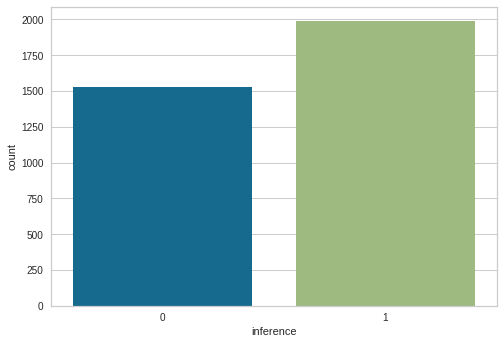

In [251]:
sns.countplot(x=data_df['inference']);

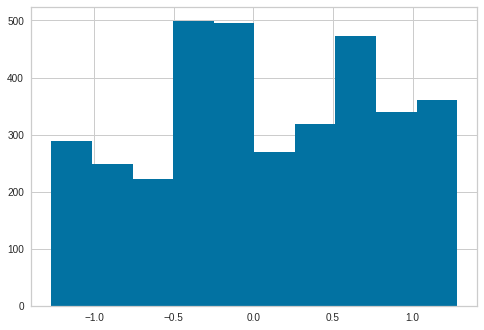

In [252]:
plt.hist(x=data_df['read00']);

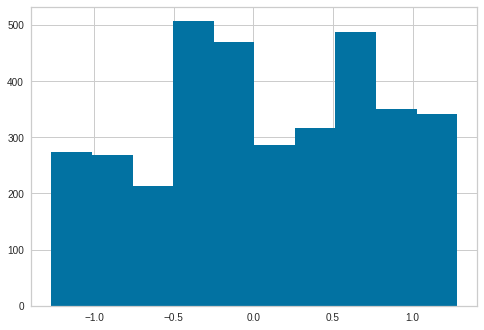

In [253]:
plt.hist(x=data_df['read40']);

## O gráfico abaixo, permite verificar a relação entre os campos, e a Label, o campo *inference* do dataframe

In [254]:
grafico = px.scatter_matrix(data_df, dimensions=['read00', 'read01'], color='inference')
grafico.show()

# Processo de divisão dos dados entre previsores e labels

Importante

> x_sensor -> previsores

> y_sensor -> labels



In [255]:
x_sensor = data_df.iloc[:, 0:22].values
x_sensor

array([[-2.90000000e-01, -7.00000000e-02,  2.40000000e-01, ...,
         1.00000000e-02,  1.66565696e+09,  1.66565697e+09],
       [-2.50000000e-01, -4.00000000e-02,  4.00000000e-02, ...,
        -3.10000000e-01,  1.66565697e+09,  1.66565698e+09],
       [-5.90000000e-01, -2.70000000e-01, -4.20000000e-01, ...,
         4.60000000e-01,  1.66565698e+09,  1.66565699e+09],
       ...,
       [-4.00000000e-02, -1.27000000e+00,  3.00000000e-02, ...,
        -1.07000000e+00,  1.67481165e+09,  1.67481167e+09],
       [-9.00000000e-02, -1.18000000e+00,  1.40000000e-01, ...,
        -1.27000000e+00,  1.67481167e+09,  1.67481168e+09],
       [ 1.50000000e-01, -1.27000000e+00,  1.50000000e-01, ...,
        -1.27000000e+00,  1.67481168e+09,  1.67481170e+09]])

In [256]:
type(x_sensor)

numpy.ndarray

In [257]:
y_sensor = data_df.iloc[:, 22].values
print(type(y_sensor))
y_sensor

<class 'numpy.ndarray'>


array([1, 1, 1, ..., 1, 1, 0])

## Escalonamento dos valores

In [258]:
x_sensor[:,0].min() , x_sensor[:,1].min(), x_sensor[:,2].min()

(-1.27, -1.27, -1.27)

In [259]:
x_sensor[:,0].max() , x_sensor[:,1].max(), x_sensor[:,2].max()

(1.28, 1.28, 1.28)

Escalonamento dos dados, para que eles possuam a escala semelhante, a fim de melhorar os resultados quando for realizar o processo de treinamento dos algoritmos, para a geração do modelo de IA, mais informações neste [link](https://scikit-learn.org/stable/modules/preprocessing.html)

Neste projeto está sendo utilizada a técnica de padronização, mais informações [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [260]:
from sklearn.preprocessing import StandardScaler
scaler_sensor = StandardScaler()

x_sensor = scaler_sensor.fit_transform(x_sensor)
print(x_sensor)

[[-0.49859101  0.30511327  0.23597395 ...  0.40834963 -3.21105037
  -3.21105069]
 [-0.44296121  0.34429944 -0.04234577 ... -0.00871732 -3.21104485
  -3.21104517]
 [-0.91581453  0.04387216 -0.68248113 ...  0.99485003 -3.2110389
  -3.21103922]
 ...
 [-0.15090474 -1.26233341 -0.05626176 ... -0.99925133  0.67488308
   0.67488274]
 [-0.220442   -1.14477491  0.09681409 ... -1.25991818  0.67488945
   0.67488868]
 [ 0.11333682 -1.26233341  0.11073007 ... -1.25991818  0.67489539
   0.67489463]]


# Divisão entre Base de treinamento e teste

20% da base para teste e 80% para treinamento dos algoritmos

In [261]:
from sklearn.model_selection import train_test_split

x_sensor_treinamento, x_sensor_teste, y_sensor_treinamento, y_sensor_teste = \
                train_test_split(x_sensor, y_sensor, test_size=0.2, random_state=0)

In [262]:
x_sensor_treinamento.shape, y_sensor_treinamento.shape

((2812, 22), (2812,))

In [263]:
x_sensor_teste.shape, y_sensor_teste.shape

((703, 22), (703,))

## Neste momento é interessante salvar os dados através de um arquivo pickle, para que posteriormente eles sejam carregados e utilizados no treinamento dos algoritmos de machine learning, desta forma, não corre o risco das variáveis que contém os dados serem atribuídas a outros valores.

In [264]:
import pickle

with open('sensor.pkl', mode='wb') as f:
  pickle.dump([x_sensor_treinamento,y_sensor_treinamento,
               x_sensor_teste, y_sensor_teste], f)

# Treinamento dos modelos de machine Learning

# Agora será utilizado o algoritmo de *Naive Bayes*, para o treinamento dos dados

### Carregamento dos dados a partir do arquivo pickle

In [265]:
with open('/content/sensor.pkl', 'rb') as f:
  x_sensor_treinamento, y_sensor_treinamento, \
  x_sensor_teste, y_sensor_teste = pickle.load(f)


print(f"Dados de treinamento: {x_sensor_treinamento.shape}, {y_sensor_treinamento.shape}")
print(f"Dados de teste: {x_sensor_teste.shape}, {y_sensor_teste.shape}")

Dados de treinamento: (2812, 22), (2812,)
Dados de teste: (703, 22), (703,)


### Importação das bibliotecas

In [266]:
from sklearn.naive_bayes import GaussianNB

In [267]:
naive_sensor_data = GaussianNB()
naive_sensor_data.fit(x_sensor_treinamento, y_sensor_treinamento)

GaussianNB()

## Realizando a previsão

In [268]:
prevision = naive_sensor_data.predict(x_sensor_teste)
prevision

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,

## Gabarito das previsões realizadas

In [269]:
y_sensor_teste

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

## O algoritmo de *Naive Bayes*, atingiu uma acurácia de 60.02%

In [270]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_sensor_teste, prevision) * 100

60.02844950213371

In [271]:
confusion_matrix(y_sensor_teste, prevision)

array([[226,  77],
       [204, 196]])

## Apresentando uma matriz de confusão que apresenta uma relação mais detalhada entre os resultados atingidos

60.02844950213371

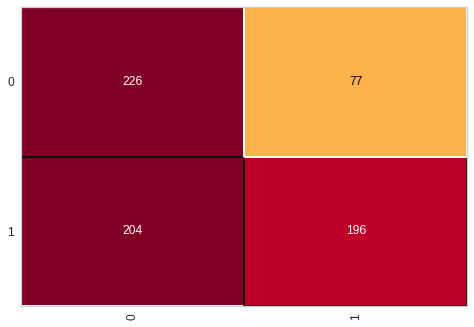

In [272]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(naive_sensor_data)
cm.fit(x_sensor_treinamento, y_sensor_treinamento)
cm.score(x_sensor_teste, y_sensor_teste) * 100

# Eixo X é a classificação a partir do Modelo
# Eixo Y é o resultado correto

## Mais detalhes a partir dos resultados atingidos

In [273]:
print(classification_report(y_sensor_teste, prevision))

              precision    recall  f1-score   support

           0       0.53      0.75      0.62       303
           1       0.72      0.49      0.58       400

    accuracy                           0.60       703
   macro avg       0.62      0.62      0.60       703
weighted avg       0.64      0.60      0.60       703



# Agora será utilizado o algoritmo SVM

### Carregamento dos dados a partir do arquivo pickle

In [274]:
with open('/content/sensor.pkl', 'rb') as f:
  x_sensor_treinamento, y_sensor_treinamento, \
  x_sensor_teste, y_sensor_teste = pickle.load(f)


print(f"Dados de treinamento: {x_sensor_treinamento.shape}, {y_sensor_treinamento.shape}")
print(f"Dados de teste: {x_sensor_teste.shape}, {y_sensor_teste.shape}")

Dados de treinamento: (2812, 22), (2812,)
Dados de teste: (703, 22), (703,)


## Importação das bibliotecas

In [275]:
from sklearn.svm import SVC

In [276]:
svm_sensor = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_sensor.fit(x_sensor_treinamento, y_sensor_treinamento)

SVC(C=2.0, random_state=1)

In [277]:
previsoes = svm_sensor.predict(x_sensor_teste)
previsoes

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [278]:
y_sensor_teste

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

## O algoritmo SVM teve uma acurárica de 76.52%

In [279]:
accuracy_score(y_sensor_teste, previsoes) * 100

76.52916073968706

76.52916073968706

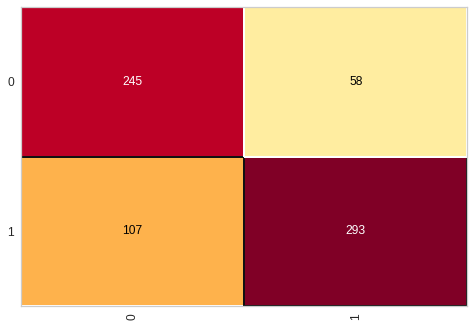

In [280]:
cm = ConfusionMatrix(svm_sensor)
cm.fit(x_sensor_treinamento, y_sensor_treinamento)
cm.score(x_sensor_teste, y_sensor_teste) * 100

In [281]:
print(classification_report(y_sensor_teste, previsoes))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       303
           1       0.83      0.73      0.78       400

    accuracy                           0.77       703
   macro avg       0.77      0.77      0.76       703
weighted avg       0.77      0.77      0.77       703



# Redes Neurais Artificiais

### Carregamento dos dados a partir do arquivo pickle

In [282]:
with open('/content/sensor.pkl', 'rb') as f:
  x_sensor_treinamento, y_sensor_treinamento, \
  x_sensor_teste, y_sensor_teste = pickle.load(f)


print(f"Dados de treinamento: {x_sensor_treinamento.shape}, {y_sensor_treinamento.shape}")
print(f"Dados de teste: {x_sensor_teste.shape}, {y_sensor_teste.shape}")

Dados de treinamento: (2812, 22), (2812,)
Dados de teste: (703, 22), (703,)


## Importação das bibliotecas

Para a criação das camadas ocultas da rede neural, foi utilizada a seguinte metodologia.

Primeiro foi realizada a soma da quantidade de features para serem analizados pela rede, neste caso são 22 features, somando mais 1, e divido por dois(podendo arredondar para o maior valor o resultado).


O resultado é a quantidade de neuronios que há em cada camada oculta da rede, neste caso haverá duas camadas ocultas, pois foi a que melhor convergio.

Calculo = (22+1)/2 = 12

In [283]:
from sklearn.neural_network import MLPClassifier

rede_neural_sensor = MLPClassifier(max_iter=1500, verbose=True, tol=0.000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (12,12))
rede_neural_sensor.fit(x_sensor_treinamento, y_sensor_treinamento)

Iteration 1, loss = 0.71308681
Iteration 2, loss = 0.68220354
Iteration 3, loss = 0.66611969
Iteration 4, loss = 0.65723562
Iteration 5, loss = 0.65120935
Iteration 6, loss = 0.64551384
Iteration 7, loss = 0.64070265
Iteration 8, loss = 0.63570597
Iteration 9, loss = 0.63048199
Iteration 10, loss = 0.62466263
Iteration 11, loss = 0.62004639
Iteration 12, loss = 0.61532838
Iteration 13, loss = 0.61105839
Iteration 14, loss = 0.60651012
Iteration 15, loss = 0.60265817
Iteration 16, loss = 0.59801168
Iteration 17, loss = 0.59417010
Iteration 18, loss = 0.59021962
Iteration 19, loss = 0.58703148
Iteration 20, loss = 0.58445438
Iteration 21, loss = 0.58108889
Iteration 22, loss = 0.57829291
Iteration 23, loss = 0.57581452
Iteration 24, loss = 0.57285593
Iteration 25, loss = 0.57018596
Iteration 26, loss = 0.56803821
Iteration 27, loss = 0.56508901
Iteration 28, loss = 0.56291684
Iteration 29, loss = 0.56041361
Iteration 30, loss = 0.55785699
Iteration 31, loss = 0.55514423
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(12, 12), max_iter=1500, verbose=True)

## Realizando as previsões utilizando Redes Neurais

In [284]:
previsoes = rede_neural_sensor.predict(x_sensor_teste)
previsoes

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [285]:
y_sensor_teste

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

## Redes Neurais Artificiais teve uma acurácia de 77.52%

In [286]:
accuracy_score(y_sensor_teste, previsoes) * 100

77.52489331436699

77.52489331436699

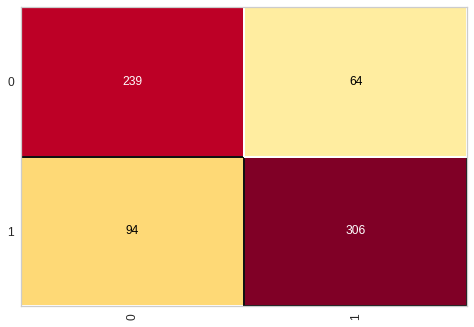

In [287]:
cm = ConfusionMatrix(rede_neural_sensor)
cm.fit(x_sensor_treinamento, y_sensor_treinamento)
cm.score(x_sensor_teste, y_sensor_teste) * 100

In [288]:
print(classification_report(y_sensor_teste, previsoes))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       303
           1       0.83      0.77      0.79       400

    accuracy                           0.78       703
   macro avg       0.77      0.78      0.77       703
weighted avg       0.78      0.78      0.78       703



# Algoritmo de árvore de decisão

### Carregamento dos dados a partir de um arquivo pickle

In [289]:
with open('/content/sensor.pkl', 'rb') as f:
  x_sensor_treinamento, y_sensor_treinamento, \
  x_sensor_teste, y_sensor_teste = pickle.load(f)


print(f"Dados de treinamento: {x_sensor_treinamento.shape}, {y_sensor_treinamento.shape}")
print(f"Dados de teste: {x_sensor_teste.shape}, {y_sensor_teste.shape}")

Dados de treinamento: (2812, 22), (2812,)
Dados de teste: (703, 22), (703,)


## Importação das bibliotecas

In [290]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
arvore_sensor = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_sensor.fit(x_sensor_treinamento, y_sensor_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [292]:
previsoes = arvore_sensor.predict(x_sensor_teste)
previsoes

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [293]:
y_sensor_teste

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

## O algoritmo de arvore de decisão conseguiu atingir uma acurácia de 74.53%

In [294]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_sensor_teste, previsoes) * 100

74.53769559032717

74.53769559032717

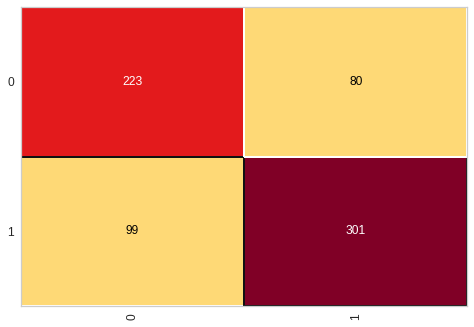

In [295]:
cm = ConfusionMatrix(arvore_sensor)
cm.fit(x_sensor_treinamento, y_sensor_treinamento)
cm.score(x_sensor_teste, y_sensor_teste) * 100

In [296]:
print(classification_report(y_sensor_teste, previsoes))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       303
           1       0.79      0.75      0.77       400

    accuracy                           0.75       703
   macro avg       0.74      0.74      0.74       703
weighted avg       0.75      0.75      0.75       703



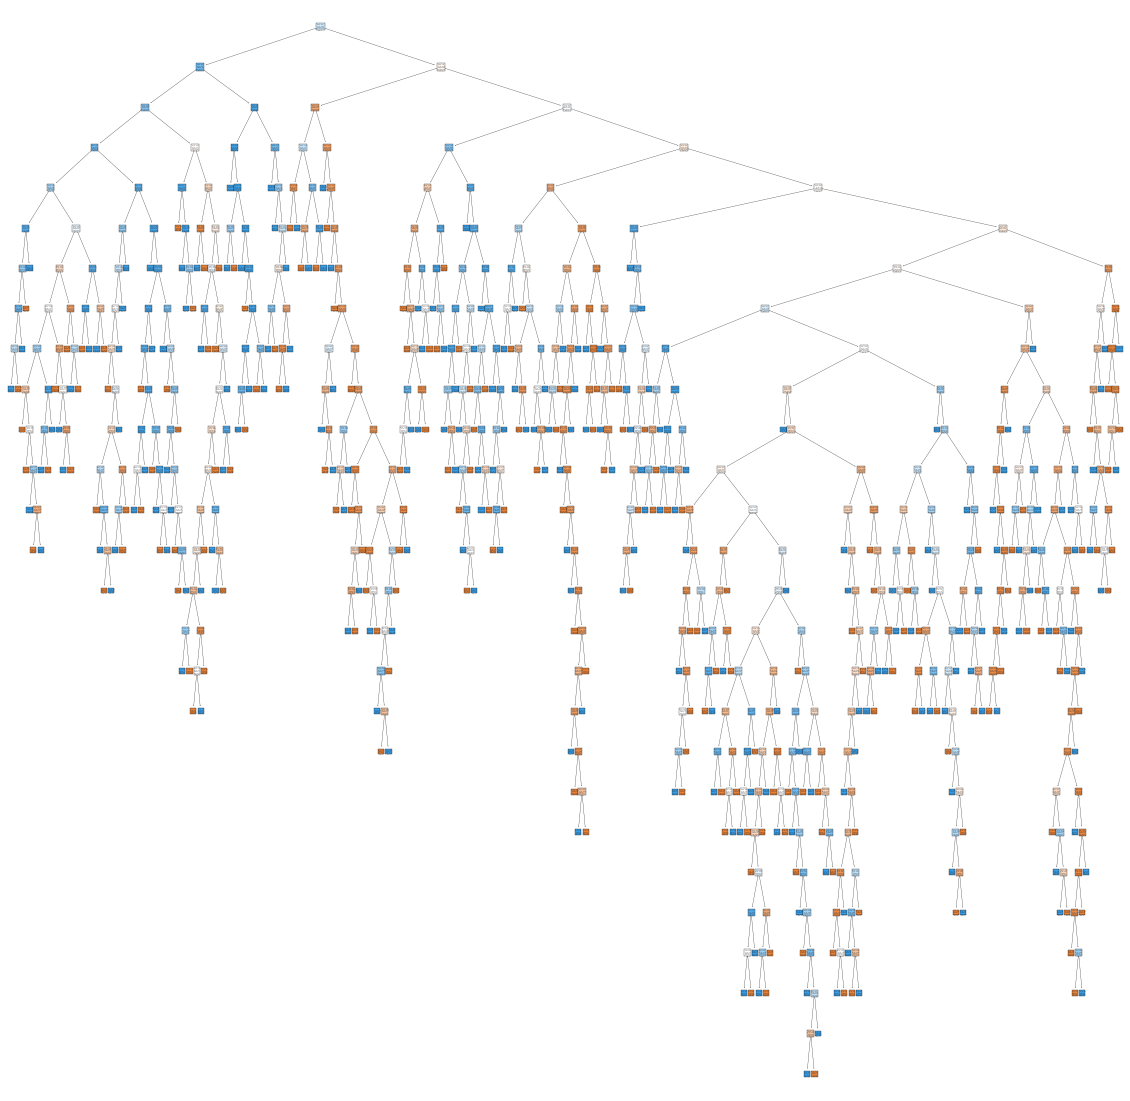

In [297]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_sensor, class_names=['0','1'], filled=True);

# Algoritmo Random Forest

### Carregamento dos dados a partir de um arquivo pickle

In [298]:
with open('/content/sensor.pkl', 'rb') as f:
  x_sensor_treinamento, y_sensor_treinamento, \
  x_sensor_teste, y_sensor_teste = pickle.load(f)


print(f"Dados de treinamento: {x_sensor_treinamento.shape}, {y_sensor_treinamento.shape}")
print(f"Dados de teste: {x_sensor_teste.shape}, {y_sensor_teste.shape}")

Dados de treinamento: (2812, 22), (2812,)
Dados de teste: (703, 22), (703,)


## Importação das bibliotecas

In [299]:
from sklearn.ensemble import RandomForestClassifier

## Instaciação do algoritmo de arvore de decisão

In [300]:
random_forest_sensor = RandomForestClassifier(n_estimators=80, criterion='entropy', random_state = 0)
random_forest_sensor.fit(x_sensor_treinamento, y_sensor_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=0)

## Realizando a previsão

In [301]:
previsoes = random_forest_sensor.predict(x_sensor_teste)
previsoes

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [302]:
y_sensor_teste

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

## O algoritmo de Random Forest atingiu 81.36% de acurácia

In [303]:
accuracy_score(y_sensor_teste, previsoes) * 100

81.3655761024182

81.3655761024182

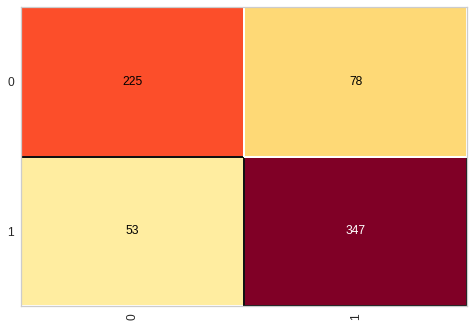

In [304]:
cm = ConfusionMatrix(random_forest_sensor)
cm.fit(x_sensor_treinamento, y_sensor_treinamento)
cm.score(x_sensor_teste, y_sensor_teste) * 100

In [305]:
print(classification_report(y_sensor_teste, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       303
           1       0.82      0.87      0.84       400

    accuracy                           0.81       703
   macro avg       0.81      0.81      0.81       703
weighted avg       0.81      0.81      0.81       703



## De todos os algoritmos de machine learning que foram avaliados, o Random Forest foi o que teve um melhor resultado, desta forma será gerado um arquivo .joblib com o modelo, para ser utilizado em um ambiente de produção 

### Gerando o arquivo para deploy do modelo

In [306]:
from joblib import dump, load
dump(random_forest_sensor, 'deploy.joblib')

['deploy.joblib']

### Para carregar os dados a partir do arquivo joblib, pode ser utilizado o script abaixo

In [307]:
model_rf = load('deploy.joblib')

In [308]:
model_rf

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=0)

In [309]:
model_rf.classes_

array([0, 1])

In [310]:
model_rf.feature_importances_

array([0.04792026, 0.04077054, 0.04221239, 0.04073067, 0.04237709,
       0.0381883 , 0.04236168, 0.03196631, 0.04202869, 0.03553642,
       0.03688722, 0.03496372, 0.04223888, 0.03542533, 0.03905315,
       0.03596252, 0.04327343, 0.03572433, 0.04638242, 0.04008533,
       0.10267987, 0.10323144])

## Testando o modelo importado a partir do arquivo joblib, com os dados de teste

In [311]:
model_rf.predict(x_sensor_teste)

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,

## Gabarito

In [312]:
y_sensor_teste

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,